<a href="https://colab.research.google.com/github/abdalrahmenyousifMohamed/ML/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OverView about **Dataset**

In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/TimeSeries/Index2018.csv")

In [276]:
df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


# Statistics methods

In [277]:
df.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [278]:
df.value_counts()

date        spx          dax       ftse         nikkei  
01/01/1996  615.930000   2260.69   3689.300000  19868.15    1
21/03/2013  1545.802976  7932.51   6388.550000  12635.69    1
21/05/1996  672.760000   2564.12   3789.400000  22091.74    1
21/04/2017  2348.694958  12048.57  7114.549511  18620.75    1
21/04/2016  2091.483661  10435.73  6381.438719  17363.62    1
                                                           ..
11/03/1994  466.440000   2101.89   3191.900000  20115.31    1
11/02/2016  1829.078346  8752.87   5536.971555  15713.39    1
11/02/2015  2068.531977  10752.11  6818.171624  17652.68    1
11/02/2014  1819.747843  9478.77   6672.658012  14718.34    1
31/12/2015  2043.936863  10743.01  6242.320781  19033.71    1
Length: 6269, dtype: int64

# Check Null Values

In [279]:
df.isnull().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

# Plotting The Data

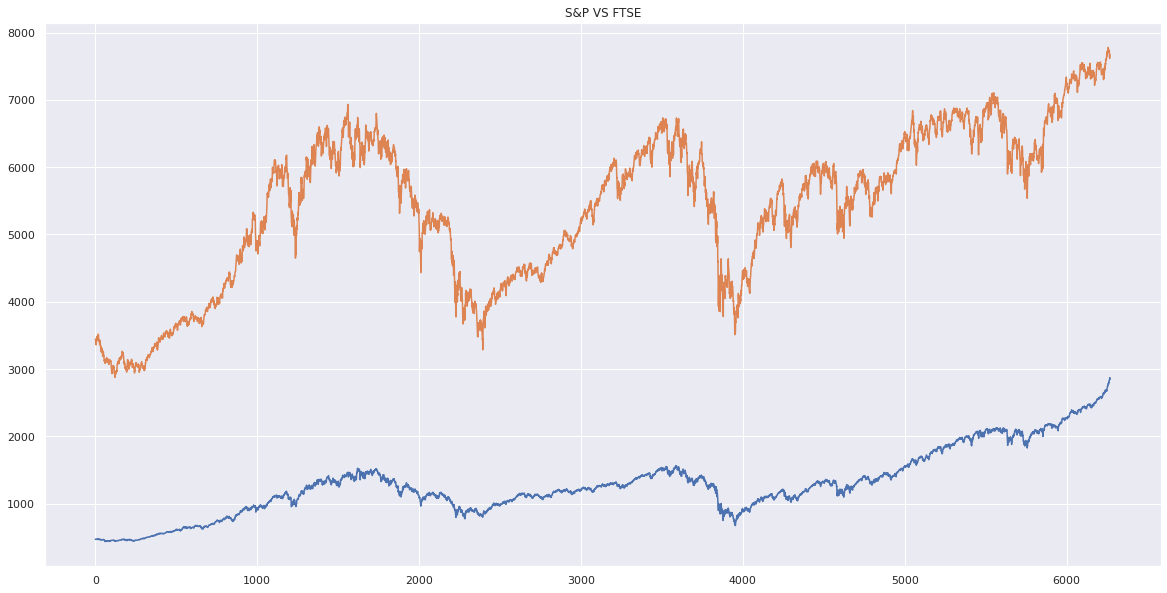

In [280]:
df.spx.plot(figsize=(20,10), title="S&P")
df.ftse.plot(figsize=(20,10) , title="FTSE")
plt.title("S&P VS FTSE")
plt.show()

We take a copy of the dataset because , we need to have the complete data load if we end up (removing) or altering data from the set

In [281]:
df_comp = df.copy()

# The QQ plot

In [282]:
import scipy.stats
import pylab

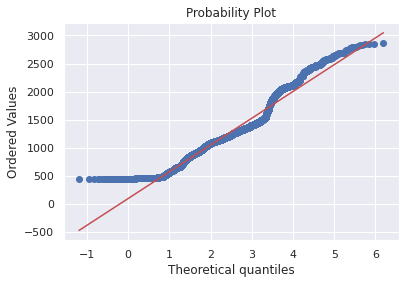

In [283]:
scipy.stats.probplot(df_comp.spx ,sparams=(2.5,), plot=pylab)
pylab.show()

1. Red Line : what data point should follow , if they are normally distributed

2. Theoretical quantiles : How many Standard Deviation is away from the mean these value are (in this case its not really the case since we have more values around 500 mark than we should)

# Length Of Time Period

we eant to analyze consecutive chunks of data and refer to the values assign to a specific day

All the "date" values are 1
Any single data holds a top value
the method randomly select one to display

In [284]:
df_comp.date.describe()

count           6269
unique          6269
top       07/01/1994
freq               1
Name: date, dtype: object

# From Text To date

we get more detailed statistics about time period

In [285]:
df_comp.date = pd.to_datetime(df_comp.date , dayfirst=True)

In [286]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [287]:
df_comp.date.describe()

count                    6269
unique                   6269
top       1994-01-07 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

# Setting The index

In [288]:
df_comp.set_index("date" , inplace=True)
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


**Once data becomes as index , we no longer save it values as seperate attributes in the data frame**

In [289]:
#df_comp.date.describe()

# Setting The Desired Frequency

In [290]:
df_comp = df_comp.asfreq('d')
df_comp

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
...,...,...,...,...
2018-01-25,2839.253031,13298.36,7615.839954,23669.49
2018-01-26,2872.867839,13340.17,7665.541292,23631.88
2018-01-27,NaN,NaN,NaN,NaN


Null values here represent the days was not recoded in dateset , and these days are Saturday , sunday , actually we generated new periods , which not have values associted with them.

# So , we better avoid adding such irrelevant time periods into our dataset

So ,  we use business days

In [291]:
df_comp = df_comp.asfreq('b')
df_comp

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


# Handling Missing Values

Setting the frequency to " business day" must have generated 8 date.
for which we have no date avaliable

In [292]:
df_comp.isnull().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

There are underlying time variant patterns in the data , this approcha is appropriate only when data heavily fluctuate around the mean from the first to the last day

In [293]:
df_comp.spx=df_comp.spx.fillna(method="ffill")
df_comp.dax=df_comp.dax.fillna(method="bfill")
df_comp.ftse=df_comp.ftse.fillna(df.ftse.mean())
df_comp.nikkei=df_comp.nikkei.fillna(method="pad")

In [294]:
df_comp.isnull().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

# Handling surplus data

drop some columns in DataSet and work with one by one

In [295]:
df_comp["market_value"] = df_comp.ftse
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']

In [296]:
df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


# Splitting Data

Time Series data relies on keeping the chronological order of values

In [297]:
df.ftse.values

array([3445.98    , 3440.58    , 3413.77    , ..., 7615.839954,
       7665.541292, 7671.5333  ])

In [298]:
size = int(len(df_comp) * 0.8)
df_train = df_comp.iloc[:size]
df_test = df_comp.iloc[size:]

In [299]:
df_train.tail()

,market_value
date,
2013-04-01,6411.74
2013-04-02,6490.66
2013-04-03,6420.28
2013-04-04,6344.11
2013-04-05,6249.77


In [300]:
df_test.head()

,market_value
date,
2013-04-08,6276.94
2013-04-09,6313.20
2013-04-10,6387.37
2013-04-11,6416.14
2013-04-12,6384.39


**Note** missing 6 , 7 day cuz it saturday and sunday

# End Of Pre Processing

# White Noise

In [301]:
wn = np.random.normal(loc = df_train.market_value.mean() , scale = df_train.market_value.std() , size=len(df_train))


In [302]:
df_train['wn'] = wn

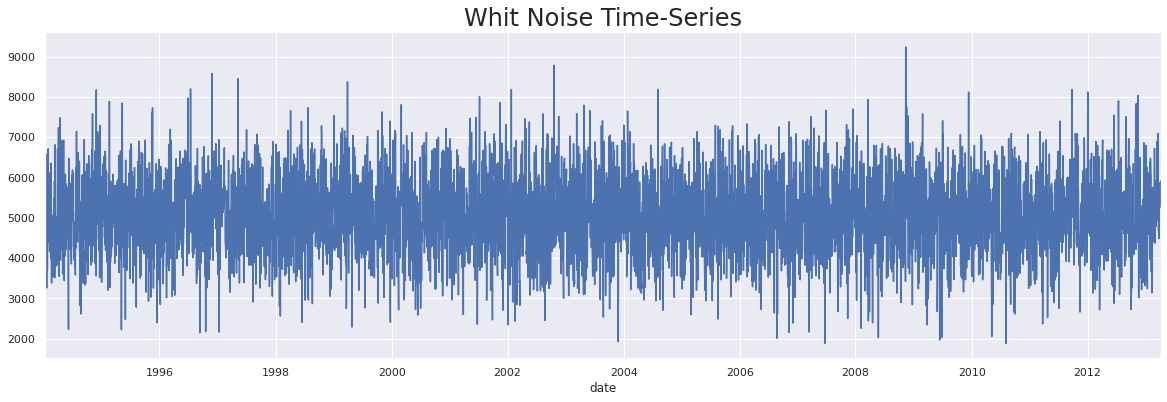

In [303]:
df_train.wn.plot(figsize=(20,6))
plt.title("Whit Noise Time-Series" , size=24)
plt.show()

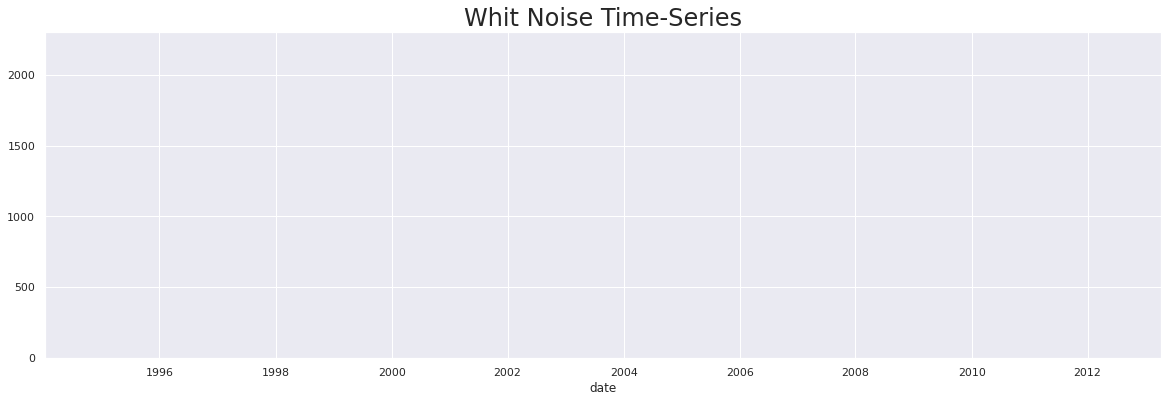

In [304]:
df_train.market_value.plot(figsize=(20,6))
plt.title("Whit Noise Time-Series" , size=24)
plt.ylim(0,2300)
plt.show()

# Random Walk

In [305]:
rw = pd.read_csv('/content/drive/MyDrive/TimeSeries/RandWalk.csv')
rw.head()

,date,price
0,07/01/1994,1122.139662
1,08/01/1994,1135.238562
2,09/01/1994,1109.897831
3,10/01/1994,1080.347860
4,11/01/1994,1082.095245


In [306]:
rw.date = pd.to_datetime(rw.date , dayfirst=True)
rw.set_index('date' , inplace=True)
rw = rw.asfreq('b')

In [307]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [308]:
df_train['rw'] = rw.price

In [309]:
df_train.head()

,market_value,wn,rw
date,,,
1994-01-07,3445.98,5041.629890,1122.139662
1994-01-10,3440.58,5808.820388,1080.347860
1994-01-11,3413.77,3395.600265,1082.095245
1994-01-12,3372.02,3723.243406,1083.639265
1994-01-13,3360.01,5024.780198,1067.146255


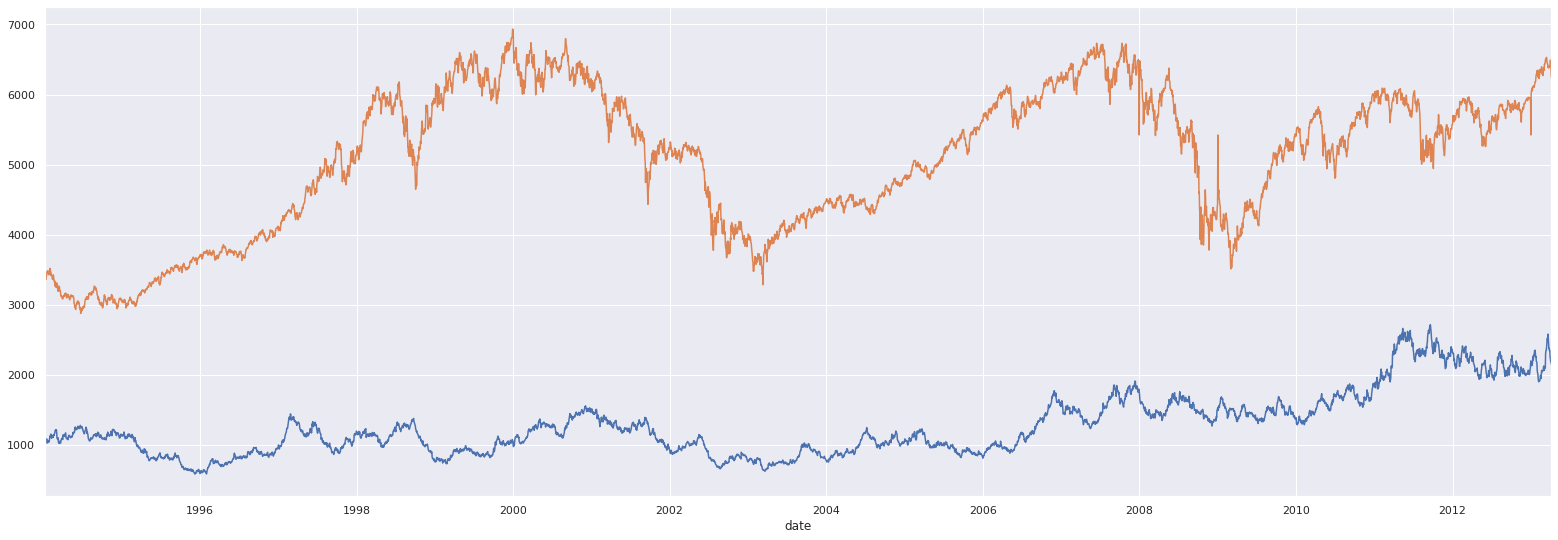

In [310]:
df_train.rw.plot(figsize=(27,9))
df_train.market_value.plot()
plt.show()

we can notice here that , small variation between consective time periods
2.  Cyclical increase and decrease in short period of Time

In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
import seaborn as sns
sns.set()

# ACF

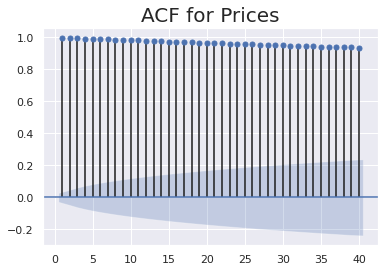

In [312]:
sgt.plot_acf(df_train.market_value, zero = False, lags = 40)
plt.title("ACF for Prices", size = 20)
plt.show()

# PACF

In [313]:
import warnings
warnings.filterwarnings("ignore")

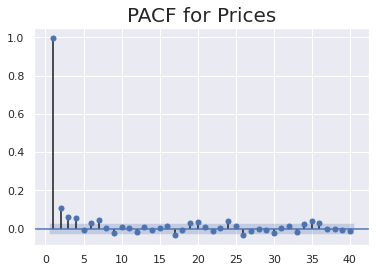

In [314]:
sgt.plot_pacf(df_train.market_value, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF for Prices", size = 20)
plt.show()

## The AR(1) Model

In [315]:
model_ar = ARMA(df_train.market_value, order=(1,0))

In [316]:
results_ar = model_ar.fit()

In [317]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -28173.171
Method:                       css-mle   S.D. of innovations             66.127
Date:                Wed, 16 Nov 2022   AIC                          56352.342
Time:                        01:13:52   BIC                          56371.906
Sample:                    01-07-1994   HQIC                         56359.197
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5085.7938    437.342     11.629      0.000    4228.619    5942.969
ar.L1.market_value     0.9981      0.001   1145.193      0.000       0.996       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0019           +0.0000j            1.0019            0.0000
-----------------------------------------------------------------------------
"""

## Higher-Lag AR Models

In [318]:
model_ar_2 = ARMA(df_train.market_value, order=(2,0))
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -28144.798
Method:                       css-mle   S.D. of innovations             65.754
Date:                Wed, 16 Nov 2022   AIC                          56297.597
Time:                        01:13:52   BIC                          56323.682
Sample:                    01-07-1994   HQIC                         56306.737
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.5395    486.186     10.468      0.000    4136.633    6042.446
ar.L1.market_value     0.8922      0.014     63.602      0.000       0.865       0.920
ar.L2.market_value     0.1061      0.014      7.557      0.000       0.079       0.134
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
AR.2           -9.4149           +0.0000j            9.4149            0.5000
-----------------------------------------------------------------------------
"""

In [319]:
model_ar_3 = ARMA(df_train.market_value, order=(3,0))
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -28135.759
Method:                       css-mle   S.D. of innovations             65.636
Date:                Wed, 16 Nov 2022   AIC                          56281.517
Time:                        01:13:53   BIC                          56314.124
Sample:                    01-07-1994   HQIC                         56292.943
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.5390    516.095      9.862      0.000    4078.012    6101.066
ar.L1.market_value     0.8859      0.014     62.908      0.000       0.858       0.913
ar.L2.market_value     0.0526      0.019      2.794      0.005       0.016       0.089
ar.L3.market_value     0.0600      0.014      4.256      0.000       0.032       0.088
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0013           -0.0000j            1.0013           -0.0000
AR.2           -0.9390           -3.9709j            4.0804           -0.2870
AR.3           -0.9390           +3.9709j            4.0804            0.2870
-----------------------------------------------------------------------------
"""

In [320]:
model_ar_4 = ARMA(df_train.market_value, order=[4,0])
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -28127.501
Method:                       css-mle   S.D. of innovations             65.527
Date:                Wed, 16 Nov 2022   AIC                          56267.003
Time:                        01:13:54   BIC                          56306.131
Sample:                    01-07-1994   HQIC                         56280.714
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5391.0057    735.677      7.328      0.000    3949.104    6832.907
ar.L1.market_value     0.8824      0.014     62.675      0.000       0.855       0.910
ar.L2.market_value     0.0495      0.019      2.635      0.008       0.013       0.086
ar.L3.market_value     0.0087      0.019      0.461      0.645      -0.028       0.046
ar.L4.market_value     0.0581      0.014      4.119      0.000       0.030       0.086
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0011           -0.0000j            1.0011           -0.0000
AR.2           -2.7275           -0.0000j            2.7275           -0.5000
AR.3            0.7886           -2.3842j            2.5112           -0.1992
AR.4            0.7886           +2.3842j            2.5112            0.1992
-----------------------------------------------------------------------------
"""

## LLR Test

In [321]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

## Comparing Higher-Lag AR Models

In [322]:
LLR_test(model_ar_2, model_ar_3)

0.0

In [323]:
LLR_test(model_ar_3, model_ar_4)

0.0

In [324]:
model_ar_4 = ARMA(df_train.market_value, order=[4,0])
results_ar_4 = model_ar_4.fit()
print(results_ar_4.summary()) 
print ("LLR test: " + str(LLR_test(model_ar_3, model_ar_4)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -28127.501
Method:                       css-mle   S.D. of innovations             65.527
Date:                Wed, 16 Nov 2022   AIC                          56267.003
Time:                        01:13:57   BIC                          56306.131
Sample:                    01-07-1994   HQIC                         56280.714
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5391.0057    735.677      7.328      0.000    3949.104    6832.907
ar.L1.market_value     0.8824      0.014     62.675      0.000       0.855       0.910
ar.L2.market_value  

In [325]:
model_ar_5 = ARMA(df_train.market_value, order=(5,0))
results_ar_5 = model_ar_5.fit()
print(results_ar_5.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_4, model_ar_5)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(5, 0)   Log Likelihood              -28127.225
Method:                       css-mle   S.D. of innovations             65.524
Date:                Wed, 16 Nov 2022   AIC                          56268.450
Time:                        01:13:59   BIC                          56314.099
Sample:                    01-07-1994   HQIC                         56284.446
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.5396    544.068      9.355      0.000    4023.186    6155.893
ar.L1.market_value     0.8827      0.014     62.578      0.000       0.855       0.910
ar.L2.market_value  

In [326]:
model_ar_6 = ARMA(df_train.market_value, order=(6,0))
results_ar_6 = model_ar_6.fit()
print(results_ar_6.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_5, model_ar_6)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(6, 0)   Log Likelihood              -28124.773
Method:                       css-mle   S.D. of innovations             65.492
Date:                Wed, 16 Nov 2022   AIC                          56265.545
Time:                        01:14:03   BIC                          56317.716
Sample:                    01-07-1994   HQIC                         56283.826
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.5395    561.246      9.068      0.000    3989.517    6189.562
ar.L1.market_value     0.8829      0.014     62.627      0.000       0.855       0.910
ar.L2.market_value  

In [327]:
model_ar_7 = ARMA(df_train.market_value, order=(7,0))
results_ar_7 = model_ar_7.fit()
print(results_ar_7.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_6, model_ar_7)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(7, 0)   Log Likelihood              -28119.906
Method:                       css-mle   S.D. of innovations             65.427
Date:                Wed, 16 Nov 2022   AIC                          56257.812
Time:                        01:14:09   BIC                          56316.504
Sample:                    01-07-1994   HQIC                         56278.378
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5424.1875    843.632      6.430      0.000    3770.699    7077.676
ar.L1.market_value     0.8815      0.014     62.603      0.000       0.854       0.909
ar.L2.market_value  

In [328]:
model_ar_8 = ARMA(df_train.market_value, order=(8,0))
results_ar_8 = model_ar_8.fit()
print(results_ar_8.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ar_7, model_ar_8)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(8, 0)   Log Likelihood              -28119.690
Method:                       css-mle   S.D. of innovations             65.425
Date:                Wed, 16 Nov 2022   AIC                          56259.379
Time:                        01:14:18   BIC                          56324.593
Sample:                    01-07-1994   HQIC                         56282.231
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.5395    588.023      8.655      0.000    3937.035    6242.044
ar.L1.market_value     0.8814      0.014     62.502      0.000       0.854       0.909
ar.L2.market_value  

In [329]:
print("LLR test: " + str(LLR_test(model_ar, model_ar_7, DF = 6)))

LLR test: 0.0


## Using Returns
solve non stationary data

In [330]:
sts.adfuller(df_train.market_value)

(-1.9113171140372955,
 0.32675605562656884,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 55903.98193294769)

 0.4107891338211091 -> extracted from non stationary process
 ,
 we shouldn't rely on AR models to make accurate forcast

In [331]:
df_train['returns'] = df_train.market_value.pct_change(1).mul(100)
# remove first period prices because autocorrelation will fail to find coefficients
df_train = df_train.iloc[1:]

In [332]:
df_train

,market_value,wn,rw,returns
date,,,,
1994-01-10,3440.58,5808.820388,1080.347860,-0.156704
1994-01-11,3413.77,3395.600265,1082.095245,-0.779229
1994-01-12,3372.02,3723.243406,1083.639265,-1.222988
1994-01-13,3360.01,5024.780198,1067.146255,-0.356166
1994-01-14,3400.56,4623.345356,1080.129720,1.206842
...,...,...,...,...
2013-04-01,6411.74,5331.785512,2263.675474,0.000000
2013-04-02,6490.66,5778.224757,2225.000870,1.230867
2013-04-03,6420.28,5554.562872,2190.787688,-1.084327


In [333]:
df_train

,market_value,wn,rw,returns
date,,,,
1994-01-10,3440.58,5808.820388,1080.347860,-0.156704
1994-01-11,3413.77,3395.600265,1082.095245,-0.779229
1994-01-12,3372.02,3723.243406,1083.639265,-1.222988
1994-01-13,3360.01,5024.780198,1067.146255,-0.356166
1994-01-14,3400.56,4623.345356,1080.129720,1.206842
...,...,...,...,...
2013-04-01,6411.74,5331.785512,2263.675474,0.000000
2013-04-02,6490.66,5778.224757,2225.000870,1.230867
2013-04-03,6420.28,5554.562872,2190.787688,-1.084327


In [334]:
sts.adfuller(df_train.returns)

(-12.731305357997687,
 9.362609194014707e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 16664.05579138392)

-17.034457190981144 < -3.431658008603046, which a good indicator that is stationary data

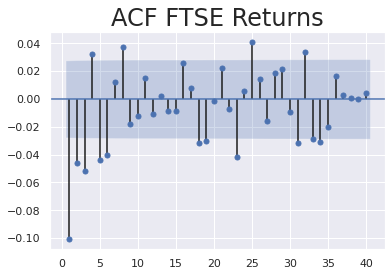

In [335]:
sgt.plot_acf(df_train.returns, lags=40, zero = False)
plt.title("ACF FTSE Returns", size=24)
plt.show()


A p-value less than 0.05 is typically considered to be statistically significant, in which case the null hypothesis should be rejected. A p-value greater than 0.05 means that deviation from the null hypothesis is not statistically significant, and the null hypothesis is not rejected.

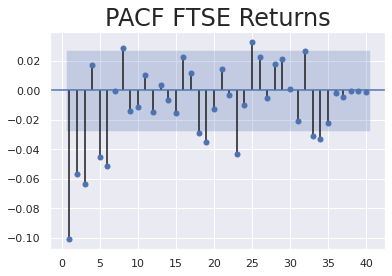

In [336]:
sgt.plot_pacf(df_train.returns, lags = 40, zero = False, method = ('ols'))
plt.title("PACF FTSE Returns", size=24)
plt.show()

How do we interpret the PACF graph?
5 of the first 6 coefficients are negative, so there is evidence of clustering.



## AR(1) for Returns
1. Define Model Specification
2. Fit the data
3. Extract The Results

In [337]:
model_ret_ar_1 = ARMA(df_train.returns, order = (1,0))

In [338]:
results_ret_ar_1 = model_ret_ar_1.fit()

In [339]:
results_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood               -8402.270
Method:                       css-mle   S.D. of innovations              1.290
Date:                Wed, 16 Nov 2022   AIC                          16810.540
Time:                        01:14:31   BIC                          16830.104
Sample:                    01-10-1994   HQIC                         16817.395
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0203      0.017      1.225      0.221      -0.012       0.053
ar.L1.returns    -0.1010      0.014     -7.195      0.000      -0.129      -0.074
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -9.8981           +0.0000j            9.8981            0.5000
-----------------------------------------------------------------------------
"""

1. **Neither is significally diffierent from 0**


2. **P Value > 0.05 , thus this model hold no real predictive power**

3. this because , the more easily yesterday's price is affacted by higher lags , the more inaccurate coefficients becomes
4. this directly decrease the predictive power of the models

## Higher-Lag AR Models for Returns

In [340]:
model_ret_ar_2 = ARMA(df_train.returns, order = (2,0))
results_ret_ar_2 = model_ret_ar_2.fit()
results_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood               -8394.106
Method:                       css-mle   S.D. of innovations              1.288
Date:                Wed, 16 Nov 2022   AIC                          16796.212
Time:                        01:14:32   BIC                          16822.297
Sample:                    01-10-1994   HQIC                         16805.353
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0203      0.016      1.299      0.194      -0.010       0.051
ar.L1.returns    -0.1068      0.014     -7.579      0.000      -0.134      -0.079
ar.L2.returns    -0.0570      0.014     -4.044      0.000      -0.085      -0.029
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9370           -4.0828j            4.1889           -0.2859
AR.2           -0.9370           +4.0828j            4.1889            0.2859
-----------------------------------------------------------------------------
"""

In [341]:
LLR_test(model_ret_ar_1, model_ret_ar_2)

0.0

In [342]:
model_ret_ar_3 = ARMA(df_train.returns, order = (3,0))
results_ret_ar_3 = model_ret_ar_3.fit()
results_ret_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 0)   Log Likelihood               -8383.993
Method:                       css-mle   S.D. of innovations              1.286
Date:                Wed, 16 Nov 2022   AIC                          16777.986
Time:                        01:14:32   BIC                          16810.592
Sample:                    01-10-1994   HQIC                         16789.412
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0204      0.015      1.389      0.165      -0.008       0.049
ar.L1.returns    -0.1104      0.014     -7.840      0.000      -0.138      -0.083
ar.L2.returns    -0.0638      0.014     -4.511      0.000      -0.092      -0.036
ar.L3.returns    -0.0634      0.014     -4.502      0.000      -0.091      -0.036
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8107           -2.3117j            2.4497           -0.1963
AR.2            0.8107           +2.3117j            2.4497            0.1963
AR.3           -2.6273           -0.0000j            2.6273           -0.5000
-----------------------------------------------------------------------------
"""

In [343]:
LLR_test(model_ret_ar_2, model_ret_ar_3)

0.0

In [344]:
model_ret_ar_4 = ARMA(df_train.returns, order = (4,0))
results_ret_ar_4 = model_ret_ar_4.fit()
print(results_ret_ar_4.summary())
print ("LLR test: " + str(LLR_test(model_ret_ar_3, model_ret_ar_4)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(4, 0)   Log Likelihood               -8383.220
Method:                       css-mle   S.D. of innovations              1.285
Date:                Wed, 16 Nov 2022   AIC                          16778.440
Time:                        01:14:32   BIC                          16817.567
Sample:                    01-10-1994   HQIC                         16792.151
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0203      0.015      1.364      0.173      -0.009       0.050
ar.L1.returns    -0.1093      0.014     -7.747      0.000      -0.137      -0.082
ar.L2.returns    -0.0627      0.014     

In [345]:
model_ret_ar_5 = ARMA(df_train.returns, order = (5,0))
results_ret_ar_5 = model_ret_ar_5.fit()
print(results_ret_ar_5.summary())
print ("LLR test: " + str(LLR_test(model_ret_ar_4, model_ret_ar_5)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(5, 0)   Log Likelihood               -8378.047
Method:                       css-mle   S.D. of innovations              1.284
Date:                Wed, 16 Nov 2022   AIC                          16770.095
Time:                        01:14:33   BIC                          16815.743
Sample:                    01-10-1994   HQIC                         16786.091
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0204      0.014      1.429      0.153      -0.008       0.048
ar.L1.returns    -0.1085      0.014     -7.697      0.000      -0.136      -0.081
ar.L2.returns    -0.0655      0.014     

In [346]:
model_ret_ar_6 = ARMA(df_train.returns, order = (6,0))
results_ret_ar_6 = model_ret_ar_6.fit()
print(results_ret_ar_6.summary())
print ("LLR test: " + str(LLR_test(model_ret_ar_5, model_ret_ar_6)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(6, 0)   Log Likelihood               -8371.384
Method:                       css-mle   S.D. of innovations              1.282
Date:                Wed, 16 Nov 2022   AIC                          16758.769
Time:                        01:14:34   BIC                          16810.938
Sample:                    01-10-1994   HQIC                         16777.050
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0204      0.014      1.507      0.132      -0.006       0.047
ar.L1.returns    -0.1109      0.014     -7.865      0.000      -0.138      -0.083
ar.L2.returns    -0.0648      0.014     

In [347]:
model_ret_ar_7 = ARMA(df_train.returns, order = (7,0))
results_ret_ar_7 = model_ret_ar_7.fit()
results_ret_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(7, 0)   Log Likelihood               -8371.384
Method:                       css-mle   S.D. of innovations              1.282
Date:                Wed, 16 Nov 2022   AIC                          16760.768
Time:                        01:14:37   BIC                          16819.458
Sample:                    01-10-1994   HQIC                         16781.334
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0204      0.014      1.508      0.132      -0.006       0.047
ar.L1.returns    -0.1109      0.014     -7.856      0.000      -0.139      -0.083
ar.L2.returns    -0.0648      0.014     -4.571      0.000      -0.093      -0.037
ar.L3.returns    -0.0676      0.014     -4.763      0.000      -0.095      -0.040
ar.L4.returns     0.0092      0.014      0.644      0.519      -0.019       0.037
ar.L5.returns    -0.0510      0.014     -3.594      0.000      -0.079      -0.023
ar.L6.returns    -0.0515      0.014     -3.634      0.000      -0.079      -0.024
ar.L7.returns    -0.0004      0.014     -0.031      0.975      -0.028       0.027
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2789           -0.9277j            1.5799           -0.0999
AR.2            1.2789           +0.9277j            1.5799            0.0999
AR.3           -0.1138           -1.5555j            1.5597           -0.2616
AR.4           -0.1138           +1.5555j            1.5597            0.2616
AR.5           -1.6652           -0.6709j            1.7953           -0.4390
AR.6           -1.6652           +0.6709j            1.7953            0.4390
AR.7         -115.2346           -0.0000j          115.2346           -0.5000
-----------------------------------------------------------------------------
"""

In [348]:
print (LLR_test(model_ret_ar_6, model_ret_ar_7))

0.975


## Normalizing Values

In [359]:
benchmark = df_train.market_value.iloc[0]

In [360]:
df_train['norm'] = df_train.market_value.div(benchmark).mul(100)

In [361]:
sts.adfuller(df_train.norm)

(-1.9010234510658566,
 0.3315798003161129,
 6,
 5013,
 {'1%': -3.431655136974821,
  '5%': -2.8621167297421373,
  '10%': -2.567076993884522},
 20603.51961001524)

In [363]:
bench_ret = df_train.returns.iloc[0]
df_train['norm_ret'] = df_train.returns.div(bench_ret).mul(100)
sts.adfuller(df_train.norm_ret)

(-12.73130535799766,
 9.362609194015717e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 81081.77970693538)

Normilizing dosen't effect our stationary data

## Normalized Returns

In [364]:
model_norm_ret_ar_1 = ARMA (df_train.norm_ret, order=(1,0))
results_norm_ret_ar_1 = model_norm_ret_ar_1.fit()
results_norm_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood              -40824.265
Method:                       css-mle   S.D. of innovations            823.352
Date:                Wed, 16 Nov 2022   AIC                          81654.529
Time:                        01:30:00   BIC                          81674.093
Sample:                    01-10-1994   HQIC                         81661.385
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -12.9100     10.555     -1.223      0.221     -33.597       7.777
ar.L1.norm_ret    -0.1010      0.014     -7.195      0.000      -0.129      -0.074
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -9.8981           +0.0000j            9.8981            0.5000
-----------------------------------------------------------------------------
"""

In [365]:
model_norm_ret_ar_2 = ARMA(df_train.norm_ret, order=(2,0))
results_norm_ret_ar_2 = model_norm_ret_ar_2.fit()
results_norm_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood              -40816.101
Method:                       css-mle   S.D. of innovations            822.014
Date:                Wed, 16 Nov 2022   AIC                          81640.202
Time:                        01:30:02   BIC                          81666.286
Sample:                    01-10-1994   HQIC                         81649.342
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -12.9100      9.969     -1.295      0.195     -32.450       6.630
ar.L1.norm_ret    -0.1068      0.014     -7.579      0.000      -0.134      -0.079
ar.L2.norm_ret    -0.0570      0.014     -4.044      0.000      -0.085      -0.029
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9370           -4.0828j            4.1889           -0.2859
AR.2           -0.9370           +4.0828j            4.1889            0.2859
-----------------------------------------------------------------------------
"""

In [366]:
model_norm_ret_ar_7 = ARMA(df_train.norm_ret, order=(7,0))
results_norm_ret_ar_7 = model_norm_ret_ar_7.fit()
results_norm_ret_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(7, 0)   Log Likelihood              -40793.379
Method:                       css-mle   S.D. of innovations            818.298
Date:                Wed, 16 Nov 2022   AIC                          81604.757
Time:                        01:30:05   BIC                          81663.448
Sample:                    01-10-1994   HQIC                         81625.323
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -12.9101      8.638     -1.494      0.135     -29.841       4.021
ar.L1.norm_ret    -0.1109      0.014     -7.856      0.000      -0.139      -0.083
ar.L2.norm_ret    -0.0648      0.014     -4.571      0.000      -0.093      -0.037
ar.L3.norm_ret    -0.0676      0.014     -4.763      0.000      -0.095      -0.040
ar.L4.norm_ret     0.0092      0.014      0.644      0.519      -0.019       0.037
ar.L5.norm_ret    -0.0510      0.014     -3.594      0.000      -0.079      -0.023
ar.L6.norm_ret    -0.0515      0.014     -3.634      0.000      -0.079      -0.024
ar.L7.norm_ret    -0.0004      0.014     -0.031      0.975      -0.028       0.027
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2789           -0.9277j            1.5799           -0.0999
AR.2            1.2789           +0.9277j            1.5799            0.0999
AR.3           -0.1138           -1.5555j            1.5597           -0.2616
AR.4           -0.1138           +1.5555j            1.5597            0.2616
AR.5           -1.6652           -0.6708j            1.7952           -0.4390
AR.6           -1.6652           +0.6708j            1.7952            0.4390
AR.7         -115.4580           -0.0000j          115.4580           -0.5000
-----------------------------------------------------------------------------
"""

using normlized values has no impact on model selection

normilizing the values only had impact on constant values but not any of the lagged coefficients

## Analysing the Residuals

In [349]:
df_train['res_price'] = results_ar_7.resid

to get general feel of the data we can mean and variance

*   the mean is close to zero  suggests that on average our model perform well 
*   but high variance indicates the residuals are not concantarted around the mean of zero but all over place

1. This is permiliary because our AR model perform poorly when predicting non stationary data



In [350]:
df_train.res_price.mean()

0.35840920758057826

In [351]:
df_train.res_price.var()

4279.892514544985

In [352]:
sts.adfuller(df_train.res_price)

(-70.8509041619788,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 55882.23389044803)

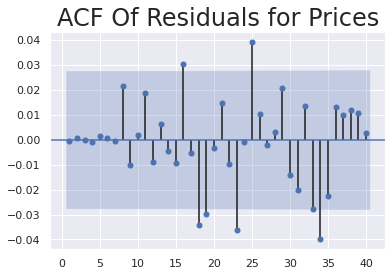

In [353]:
sgt.plot_acf(df_train.res_price, zero = False, lags = 40)
plt.title("ACF Of Residuals for Prices",size=24)
plt.show()

not significally diffierent from zero which fits the characteristic of white noise
white noise is stationary data

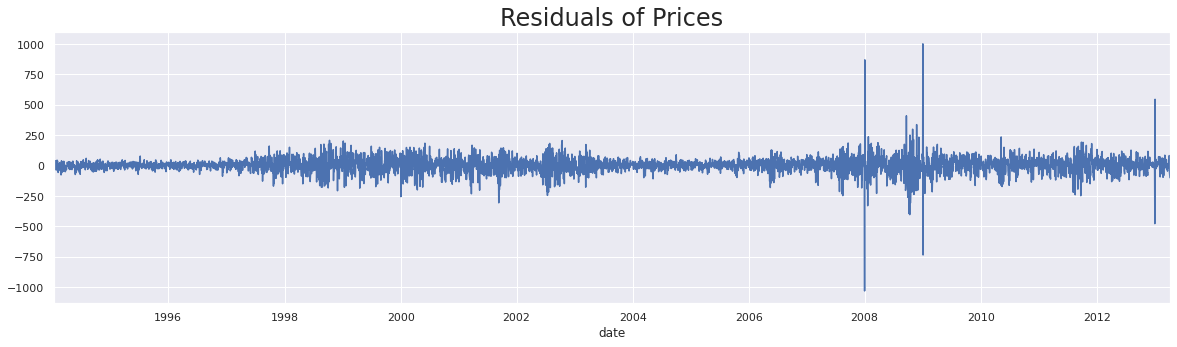

In [354]:
df_train.res_price[1:].plot(figsize=(20,5))
plt.title("Residuals of Prices",size=24)
plt.show()

## Analysing the Residuals

In [367]:
df_train['res_ret'] = results_ret_ar_6.resid

In [368]:
df_train.res_ret.mean()

-6.392305399902229e-05

In [369]:
df_train.res_ret.var()

1.6446500925830208

In [370]:
sts.adfuller(df_train.res_ret)

(-70.82259400968672,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 16657.05036755905)

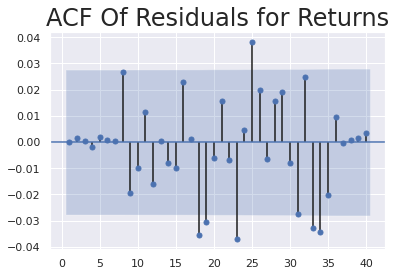

In [371]:
sgt.plot_acf(df_train.res_ret, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

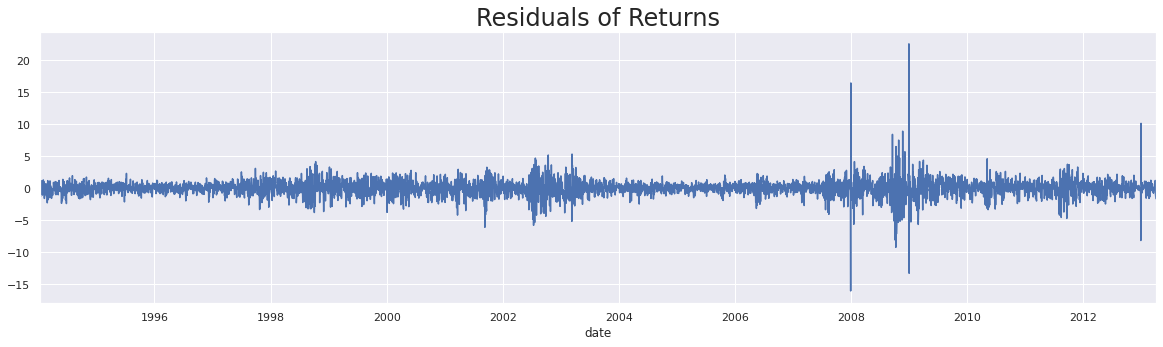

In [372]:
df_train.res_ret.plot(figsize=(20,5))
plt.title("Residuals of Returns", size=24)
plt.show()

Why do we plot the ACF and/or PACF of the residuals from a fitted model?

**If the residuals are non-random (not White Noise), then there is a pattern that needs to be accounted for.**